# Worksheet Questions

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
data = pd.read_csv("GP208_HW1_Barnett_Density_Log.txt",delimiter="\t")
data.columns=["depth", "rho"]

In [3]:
depth=data.depth.values
density=data.rho.values

Insert a surface to top-of-logging-depth value of 1.9 g/cc.

In [4]:
depth=np.insert(depth,0,0)
density=np.insert(density,0,1.9)

## Question 1: Plot density and function of depth. 
Use a scientific computing or plotting program to plot
density as function depth. It is conventional to put density on the x-axis and depth on an
inverted y-axis.

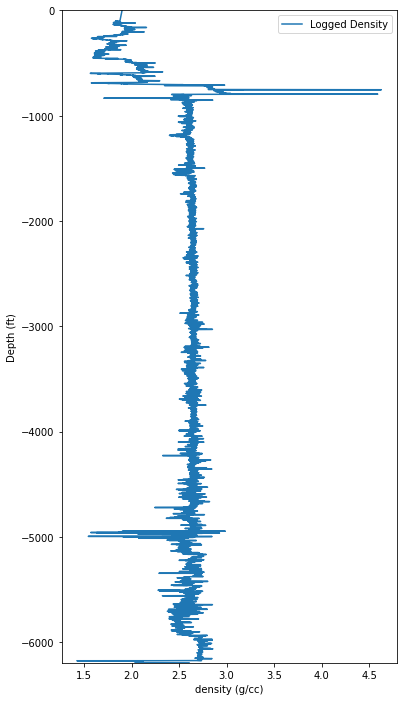

In [48]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 12)
plt.plot(density,-depth,label="Logged Density")
plt.legend()
plt.xlabel("density (g/cc)")
plt.ylabel("Depth (ft)")
plt.ylim(-np.max(depth),0)
plt.show()

## Question 2: Divide the density profile into 5 blocks. 
Designate 5 blocks representing sections of
approximately constant density as a function of depth (e.g., 0-500 ft, 500-1000 ft, 1000-
3000 ft, 3000-5000 ft, 5000-7000 ft. Compute the average density in each block and plot
blocked density vs. depth on the same plot as (a).

These values were determined by looking at them and aligning them roughly with the logged values. I am sure there is a better way of doing this???

In [6]:
rho_blocked=np.piecewise(
    depth,
    [depth<6194,depth<5900,depth<800,depth<700,depth<500],
    [2.7,2.65,2.9,2.1,1.8])

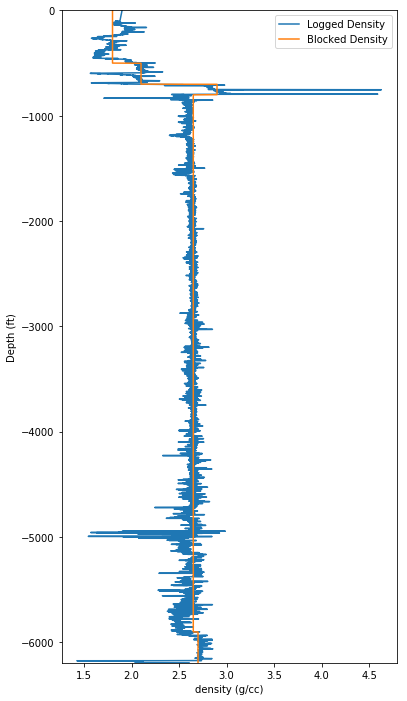

In [47]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 12)
plt.plot(density,-depth,label="Logged Density")
plt.plot(rho_blocked,-depth,label="Blocked Density")
plt.legend()
plt.xlabel("density (g/cc)")
plt.ylabel("Depth (ft)")
plt.ylim(-np.max(depth),0)
plt.show()

## Question 3: Calculate the vertical stress. 
Calculate and plot the vertical stress using both the continuous
and blocked density profiles in units of psi. On the same plot, calculate and plot a
hydrostatic pore pressure gradient. Use 1000 kg/m 3 for the density of water. Use 10.0 m/s 2
to approximate g, acceleration due to gravity.

## Question 4: Calculate the vertical stress gradient. 
Calculate and plot the vertical stress gradient using
the blocked density profile by integrating the vertical stress as function of depth.

In [8]:
depth_m=depth*0.3048
ChangeDepth=depth_m-(np.roll(depth_m,1))
ChangeDepth[0]=0
gradient_unblocked=density*10*(ChangeDepth)
gradient_blocked=rho_blocked*10*(ChangeDepth)
gradient_hydrostatic=1*10*(ChangeDepth)

In [35]:
# We are dividing by the depth, and this contains the surface pick, so catch issues
with np.errstate(divide='ignore',invalid='ignore'):
    gradient_unblocked_SI=gradient_unblocked.cumsum()/depth_m
    gradient_unblocked_SI[0]=0
    gradient_unblocked_psi=gradient_unblocked_SI/23

    gradient_blocked_SI=gradient_blocked.cumsum()/depth_m
    gradient_blocked_SI[0]=0
    gradient_blocked_psi=gradient_blocked_SI/23

    gradient_hydrostatic_SI=gradient_hydrostatic.cumsum()/depth_m
    gradient_hydrostatic_SI[0]=0
    gradient_hydrostatic_psi=gradient_hydrostatic_SI/23

In [10]:
#Quick QC (should be 0.433 psi/ft ~ g=9.801m/ss)
gradient_hydrostatic_psi

array([0.        , 0.43478261, 0.43478261, ..., 0.43478261, 0.43478261,
       0.43478261])

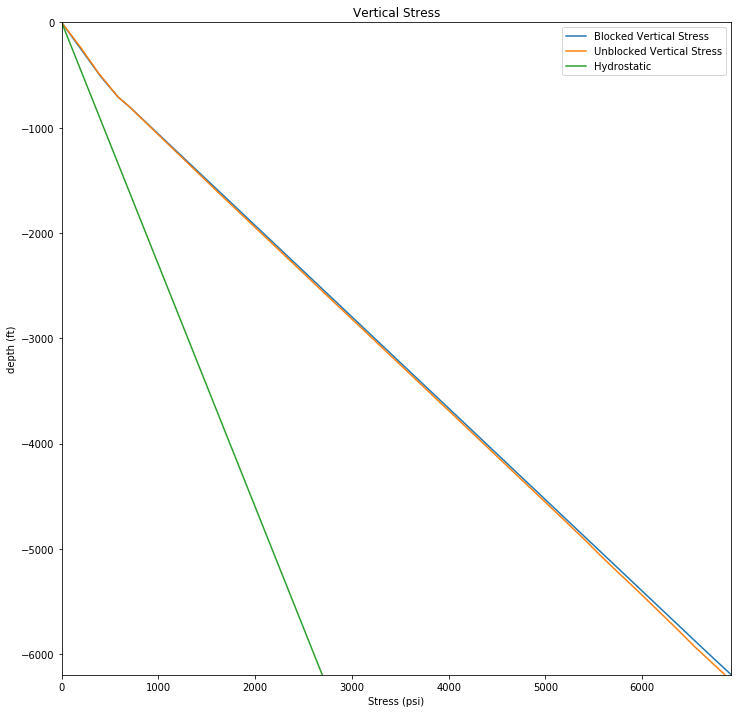

In [49]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)
plt.plot(gradient_blocked_psi*depth,-depth,label="Blocked Vertical Stress")
plt.plot(gradient_unblocked_psi*depth,-depth,label="Unblocked Vertical Stress")
plt.plot(gradient_hydrostatic_psi*depth,-depth,label="Hydrostatic")
plt.legend(loc='upper right')
plt.title("Vertical Stress")
plt.xlabel("Stress (psi)")
plt.ylabel("depth (ft)")
plt.ylim(-np.max(depth),0)
plt.xlim(0,np.max(gradient_blocked_psi*depth))
plt.show()

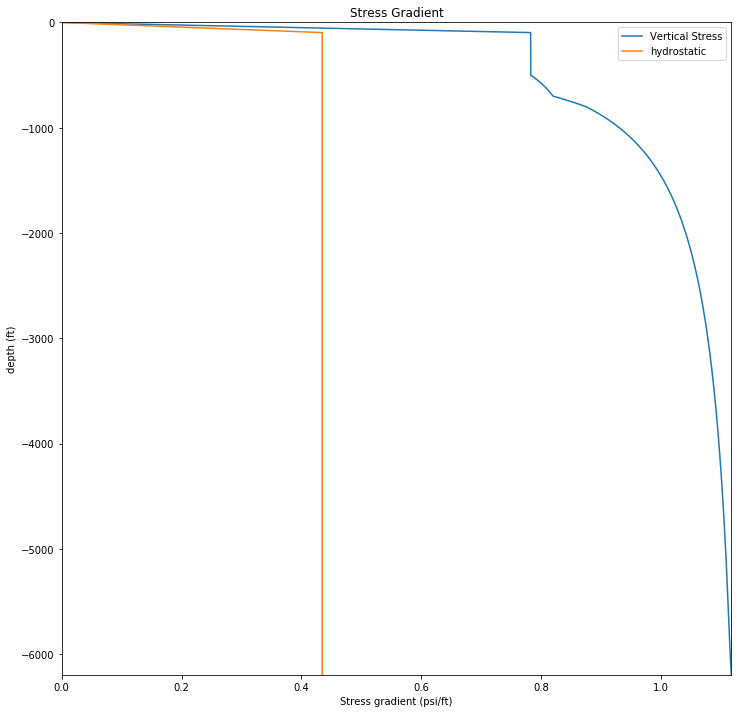

In [53]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)
plt.plot(gradient_blocked_psi,-depth,label='Vertical Stress')
plt.plot(gradient_hydrostatic_psi,-depth,label='hydrostatic')
plt.legend(loc='upper right')
plt.title("Stress Gradient")
plt.xlabel("Stress gradient (psi/ft)")
plt.ylabel("depth (ft)")
plt.ylim(-np.max(depth),0)
plt.xlim(0,np.max(gradient_blocked_psi))
plt.show()

## Part 2: Calculate the stress magnitude constraints for each type of faulting regime. 
DFIT
measurements indicate that the instantaneous shut-in pressure (ISIP) is 38 MPa at 5500 ft
depth. Use frictional faulting theory (Unit 3) to calculate the stress magnitude constraints
for each type of Andersonian faulting regime.
Use the following values:

Depth = 5500 ft

Vertical stress, S_V = value obtained in Part 1c for blocked data

Coefficient of sliding friction, μ = 0.6

Pore pressure gradient = 0.5 psi/ft

Start with constants

In [1]:
psi2Mpa=0.006894759086775369
curr_depth=5500
Pp_grad=0.5
mu=0.6


Pp=(Pp_grad*curr_depth)*psi2Mpa
Sv=float((gradient_blocked_psi[np.where(depth==curr_depth)]*curr_depth)*psi2Mpa)
f_of_mu=(np.sqrt(mu**2+1)+mu)**2


NameError: name 'gradient_blocked_psi' is not defined

Run the zobackogram limitation calculations

In [56]:
ShMin_lower=(Sv-Pp)/f_of_mu+Pp
ShMin_lowerY=np.arange(ShMin_lower,Sv)
ShMin_lowerX=ShMin_lowerY*0+ShMin_lower

SHMax_Upper=f_of_mu*(Sv-Pp)+Pp
SHMax_UpperX=np.arange(Sv,SHMax_Upper)
SHMax_UpperY=SHMax_UpperX*0+SHMax_Upper

SS_Upper_X=np.arange(ShMin_lower,Sv+1)
SS_Upper_Y=f_of_mu*(SS_Upper_X-Pp)+Pp


shmax_lower_limit=np.arange(0,1.1*SHMax_Upper)
RF_lowerX_y=np.arange(Sv,SHMax_Upper)
RF_lowerX_x=RF_lowerX_y*0+Sv
NF_UpperY_x=np.arange(ShMin_lower,Sv+1)
NF_UpperY_y=NF_UpperY_x*0+Sv

Plot the Zobackogram for the current location

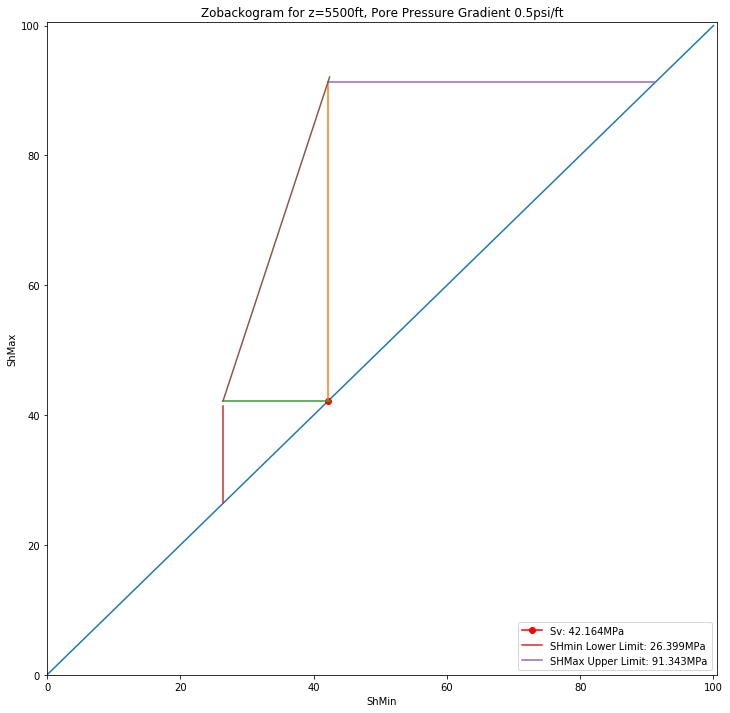

In [60]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,12)
plt.plot(shmax_lower_limit,shmax_lower_limit)
plt.plot(Sv,Sv,marker='o', markersize=6, color="red",label='Sv: '+str(np.around(Sv,3))+"MPa")
plt.plot(RF_lowerX_x,RF_lowerX_y)
plt.plot(NF_UpperY_x,NF_UpperY_y)
plt.plot(ShMin_lowerX,ShMin_lowerY,label='SHmin Lower Limit: '+str(np.around(ShMin_lower,3))+"MPa")
plt.plot(SHMax_UpperX,SHMax_UpperY,label='SHMax Upper Limit: '+str(np.around(SHMax_Upper,3))+"MPa")
plt.plot(SS_Upper_X,SS_Upper_Y)
plt.legend(loc='lower right')
plt.title("Zobackogram for z="+str(curr_depth)+"ft, Pore Pressure Gradient "+str(Pp_grad)+"psi/ft" )
plt.xlabel("ShMin")
plt.ylabel("ShMax")
plt.xlim(0,1.1*SHMax_Upper)
plt.ylim(0,1.1*SHMax_Upper)
plt.show()

Wrap the whole thing into a function that can be run to answer all questions.

In [61]:
def Plot_Zobackogram (curr_depth, Pp_grad):
    Pp=(Pp_grad*curr_depth)*psi2Mpa
    Sv=float((gradient_blocked_psi[np.where(depth==curr_depth)]*curr_depth)*psi2Mpa)
    f_of_mu=(np.sqrt(mu**2+1)+mu)**2
    ShMin_lower=(Sv-Pp)/f_of_mu+Pp
    ShMin_lowerY=np.arange(ShMin_lower,Sv)
    ShMin_lowerX=ShMin_lowerY*0+ShMin_lower
    
    SHMax_Upper=f_of_mu*(Sv-Pp)+Pp
    SHMax_UpperX=np.arange(Sv,SHMax_Upper)
    SHMax_UpperY=SHMax_UpperX*0+SHMax_Upper

    SS_Upper_X=np.arange(ShMin_lower,Sv+1)
    SS_Upper_Y=f_of_mu*(SS_Upper_X-Pp)+Pp

    shmax_lower_limit=np.arange(0,1.1*SHMax_Upper)
    RF_lowerX_y=np.arange(Sv,SHMax_Upper)
    RF_lowerX_x=RF_lowerX_y*0+Sv
    NF_UpperY_x=np.arange(ShMin_lower,Sv+1)
    NF_UpperY_y=NF_UpperY_x*0+Sv
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12,12)
    plt.plot(shmax_lower_limit,shmax_lower_limit)
    plt.plot(Sv,Sv,marker='o', markersize=6, color="red",label='Sv: '+str(np.around(Sv,3))+"MPa")
    plt.plot(RF_lowerX_x,RF_lowerX_y)
    plt.plot(NF_UpperY_x,NF_UpperY_y)
    plt.plot(ShMin_lowerX,ShMin_lowerY,label='SHmin Lower Limit: '+str(np.around(ShMin_lower,3))+"MPa")
    plt.plot(SHMax_UpperX,SHMax_UpperY,label='SHMax Upper Limit: '+str(np.around(SHMax_Upper,3))+"MPa")
    plt.plot(SS_Upper_X,SS_Upper_Y)
    plt.legend(loc='lower right')
    plt.title("Zobackogram for z="+str(curr_depth)+"ft, Pore Pressure Gradient "+str(Pp_grad)+"psi/ft" )
    plt.xlabel("ShMin (MPa)")
    plt.ylabel("ShMax (MPa)")
    plt.xlim(0,1.1*SHMax_Upper)
    plt.ylim(0,1.1*SHMax_Upper)
    plt.show()

# Assignment Questions

## Question 1: Density Profile 

Refer to your density profile to answer this question (Part 1a and b). 
Enter your answers in the blank WITHOUT units.

What is the logged density in the Barnett shale at 5500 ft depth in g/cc?

In [62]:
curr_depth=5500
float((density[np.where(depth==curr_depth)]))

2.594

## Question 2 - Vertical Stress Profile

Refer to your vertical stress profile to answer this question (Part 1c). Enter your answers in the blank WITHOUT units.

What is the vertical stress in the Barnett shale well at 5500 ft depth in SI units (MPa)?

What is the pore pressure in the Barnett shale well at 5500 ft depth in SI units (MPa)?

In [63]:
np.around(float(gradient_unblocked_psi[np.where(depth==curr_depth)]*curr_depth)*psi2Mpa,2)

41.86

In [64]:
np.around(float(gradient_hydrostatic_psi[np.where(depth==curr_depth)]*curr_depth)*psi2Mpa,2)

16.49

## Question 3 - Vertical Stress Gradient


Refer to your vertical stress profile to answer this question (Part 1d). 

Enter your answers in the blank WITHOUT units.

What is the vertical stress gradient in the Barnett shale well at 5500 ft depth in psi/ft?

In [65]:
np.around(float(gradient_blocked_psi[np.where(depth==curr_depth)]),3)

1.112

## Question 4 - Stress Magnitude Constraints

Refer to your stress polygon to answer this question (Part 2a and c). .

What is the upper bound on SHmax from reverse faulting in SI units (MPa)?


What is the lower bound on Shmin from normal faulting in SI units (MPa)?


Given an ISIP of 38 MPa, what is the upper bound on SHmax in SI units (MPa)?


Given an ISIP of 38 MPa, what is the lower bound on SHmax in SI units (MPa)?

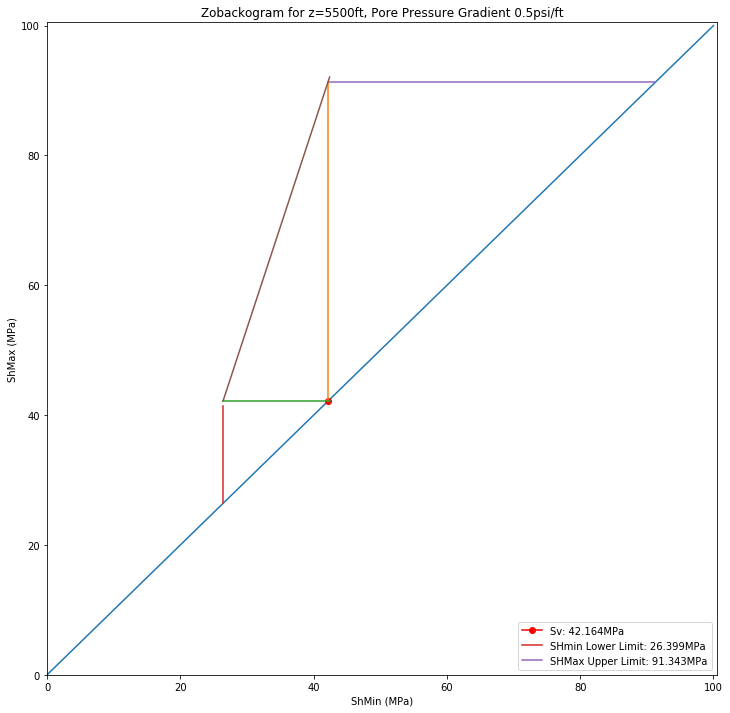

78.35

In [66]:
Plot_Zobackogram(5500,0.5)
np.around(f_of_mu*(38-Pp)+Pp,2)

## Question 5 - Possible Stress States


Refer to your stress polygon to answer this question (Part 2a and c). Select ALL possible correct answers.
Given an ISIP of 38 MPa, which of the following stress states are possible?


Answer: As 38 MPa is less than the vertical stress, we could be in either the Slip-Strike and/or Normal Faulting regime.

## Question 6 - Stress Magnitude Constraints II

Refer to Part 2b to answer this question. Enter your answers in the blank WITHOUT units.

Given an ISIP of 28 MPa, what is the upper bound on SHmax in SI units (MPa)?


Given an ISIP of 28 MPa, what is the lower bound on SHmax in SI units (MPa)?

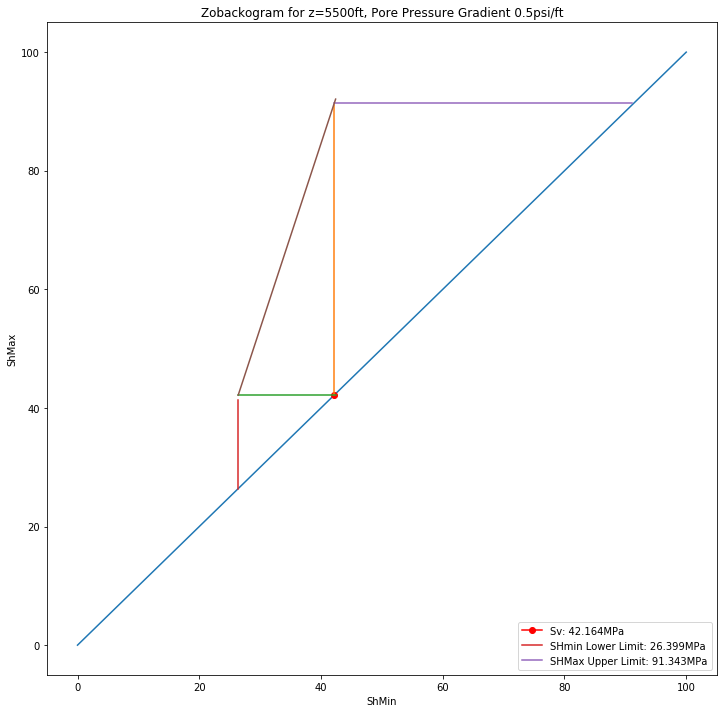

47.16

In [22]:
Plot_Zobackogram(5500,0.5)
np.around(f_of_mu*(28-Pp)+Pp,2)

## Question 7 - Stress Magnitude Constraints III

Refer to your stress polygon to answer this question (Part 2d). 


What is the upper bound on SHmax from reverse faulting in SI units (MPa)?


What is the lower bound on Shmin from normal faulting in SI units (MPa)?


Given an ISIP of 38 MPa, what is the upper bound on SHmax in SI units (MPa)?


Given an ISIP of 38 MPa, what is the lower bound on SHmax in SI units (MPa)?

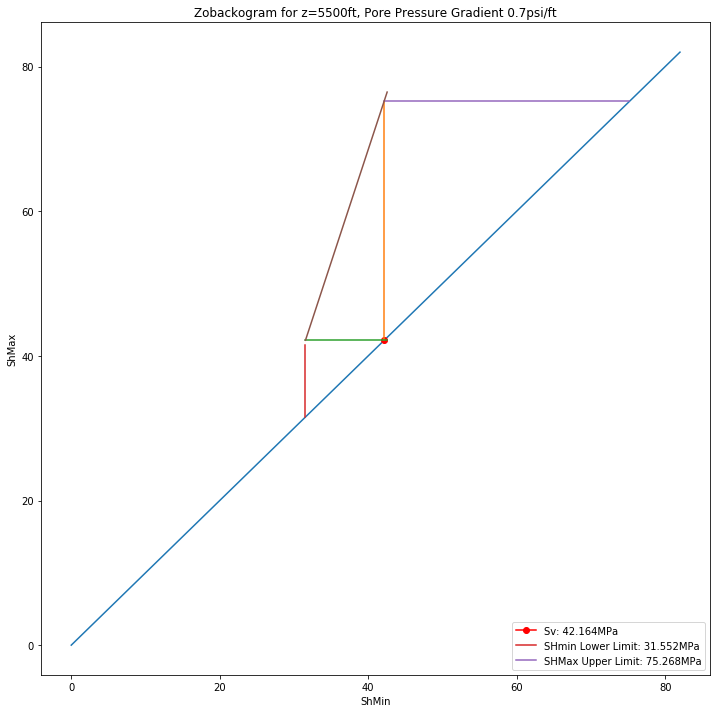

62.28

In [23]:
Plot_Zobackogram(5500,0.7)

Pp=(0.7*curr_depth)*psi2Mpa
np.around(f_of_mu*(38-Pp)+Pp,2)

## Question 8 - Effect of Overpressure
0.0/5.0 points (graded)

Refer to your stress polygon to answer this question (Part 2d). Select ALL possible correct answers.

How does overpressure affect the stress polygon and the range of allowable stress states?

Decreases the size of the stress polygon and range of allowable stress states

Increases the size of the stress polygon and range of allowable stress states

No effect on the size of the stress polygon and the range of allowable stress states 

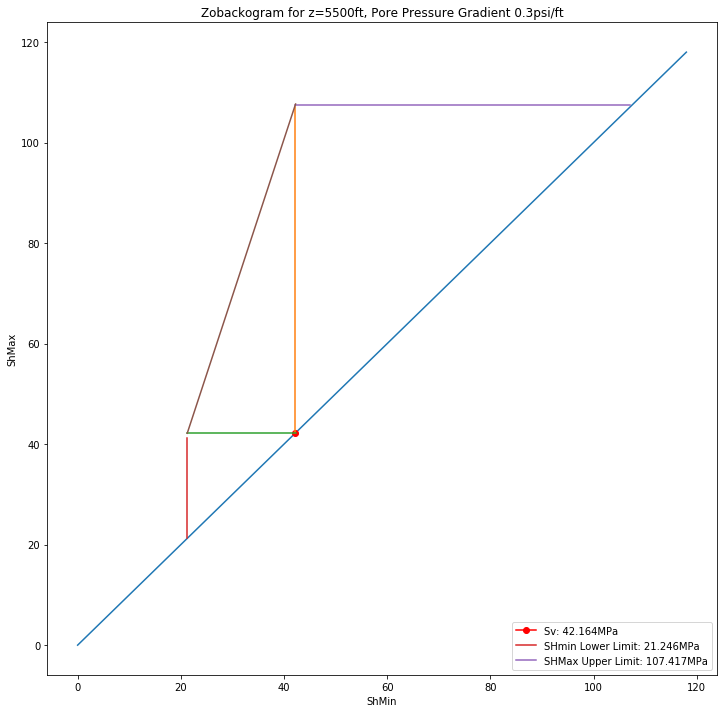

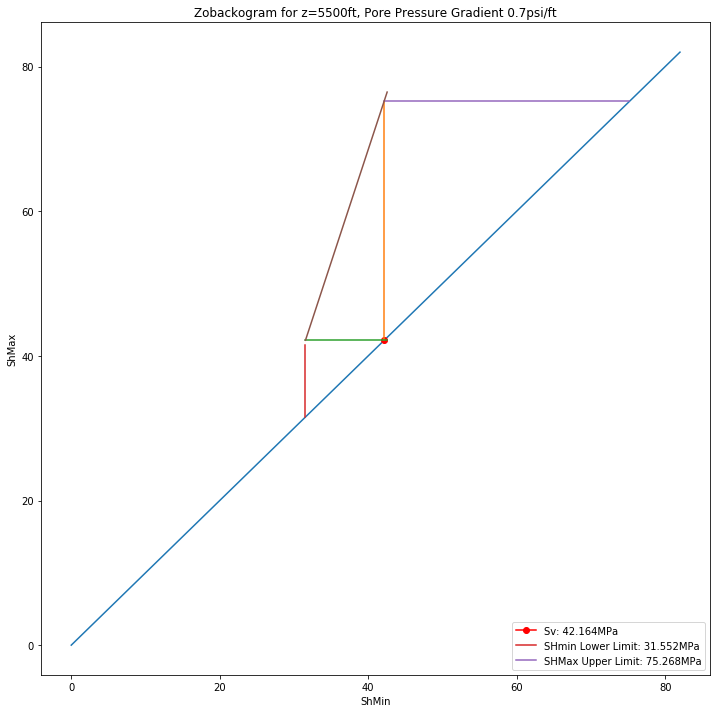

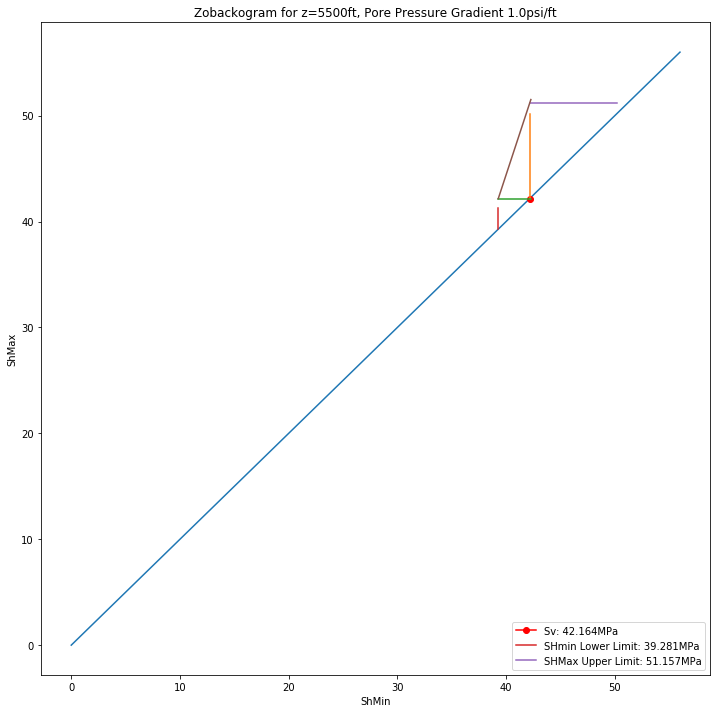

In [24]:
Plot_Zobackogram(5500,0.3)
Plot_Zobackogram(5500,0.7)
Plot_Zobackogram(5500,1.0)

Increasing the pore pressure decreases the size of the stress polygon and the range of allowable stress states